# Visual correspondence-based explanations improve AI robustness and human-AI team accuracy

by Giang Nguyen *, Mohammad R. Taesiri *, and Anh Nguyen.



https://github.com/anguyen8/visual-correspondence-XAI


https://arxiv.org/abs/2208.00780


We propose two architectures of interpretable image classifiers that first explain, and then predict by harnessing the visual correspondences between a query image and exemplars. Our models improve on several out-of-distribution (OOD) ImageNet datasets while achieving competitive performance on ImageNet than the black-box baselines (e.g. ImageNet-pretrained ResNet-50). On a large-scale human study (∼60 users per method per dataset) on ImageNet and CUB, our correspondence-based explanations led to human-alone image classification accuracy and human-AI team accuracy that are consistently better than that of kNN. We show that it is possible to achieve complementary human-AI team accuracy (i.e., that is higher than either AI-alone or human-alone), on ImageNet and CUB.




## Prepare model

In [15]:
#from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import vgg16, VGG16_Weights
import torch
import torchvision.transforms as transforms

import sys, os
sys.path.append("/home/azureuser/Why/")
from why import VisualCorrespondenceExplainer

from PIL import Image
import numpy as np


weights = VGG16_Weights.DEFAULT

model = vgg16(weights=weights)
model.eval()







## Define preprocess function, but in "explain" function, you can give np.array directly.



In [27]:
def preprocess_function(image_url):
    # Read image
    img = Image.open(image_url).convert('RGB')
    
    
    preprocess = weights.transforms()
    img_batch = preprocess(img)

    img_batch = torch.unsqueeze(img_batch,0)
    img_batch = torch.tensor(img_batch).float()
        
    return img_batch



## Create training data dictionary

In [28]:
imagenet_path = "/home/azureuser/Why/smallimagenet/imagenette2-320/train/"

classes = os.listdir(imagenet_path)

training_data = [] 
i = 0
for class_ in classes:
    class_path = os.path.join(imagenet_path,class_)
    for img in os.listdir(class_path)[:30]:
        image_dict = {"image_path": os.path.join(class_path,img), "class":i}
        training_data.append(image_dict)

    i += 1

### Training Data looks like this:



In [25]:
training_data[0]

{'image_path': '/home/azureuser/Why/smallimagenet/imagenette2-320/train/n02102040/n02102040_7886.JPEG',
 'class': 0}

## Visual Correspondence Explainer

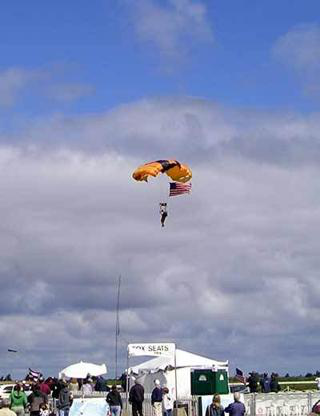

In [16]:

visual_correspondence_explainer = VisualCorrespondenceExplainer(model)
visual_correspondence_explainer.setup(preprocess_function=preprocess_function, training_data=training_data, artifacts_filename="vgg_smallimagenet")

baseimg = training_data[150]["image_path"]


Image.open(baseimg)




##  Explain 

In [30]:
emd_dist_ = visual_correspondence_explainer.explain(image_path = baseimg)


/tmp/ipykernel_1605819/3012904601.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_batch = torch.tensor(img_batch).float()


In [31]:
most_similar_image = 4


In [32]:
similar_filename = emd_dist_[most_similar_image]["image_path"]
heatmap = emd_dist_[most_similar_image]["heatmap"]
heatmap_on_image, filename = visual_correspondence_explainer.overlay_heatmap(similar_filename, heatmap, return_bytes=False)


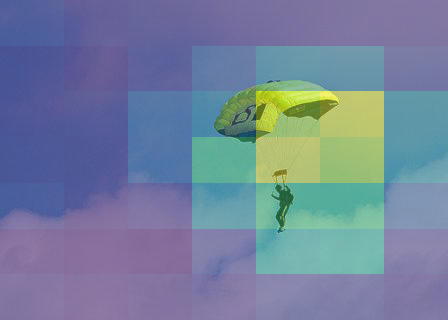

In [33]:
heatmap_on_image